# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


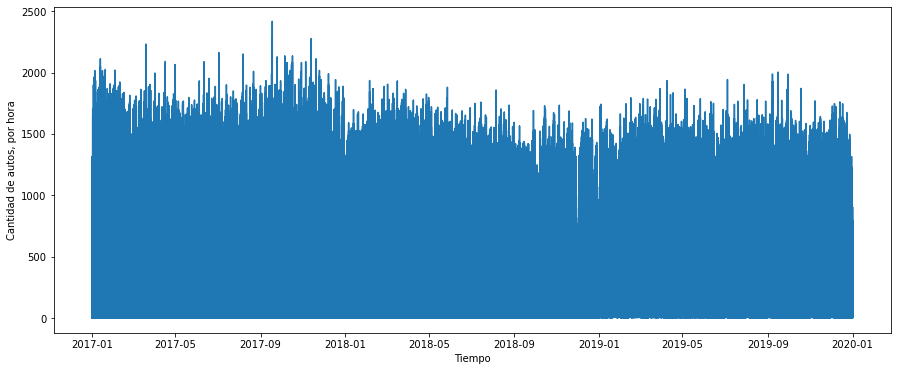

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


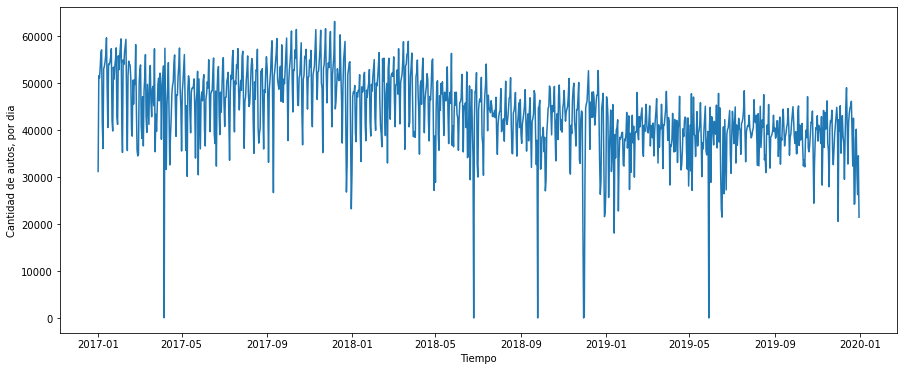

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

A continuación continuaré realizando análisis exploratorio de datos, para lograr una mejor comprensión del data set sobre el que trabajaré.

Lo primero que llama la atención de la serie de tiempo son los días en que hubo muy pocos pasos de autos por la estación de peaje.
A continuación intentaré encontrar las explicaciones para dichos días.

In [17]:
pasos_outliers = diario[diario.cantidad_pasos < 1000]  
pasos_outliers

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


A partir de la información recaba en Google, se obtuvo lo siguiente:

- 06/04/2017: Jueves, Paro general
- 25/06/2018: Lunes, Paro nacional
- 25/09/2018: Martes, Paro nacional
- 30/11/2018: Viernes, Cumbre del G20 en Buenos Aires
- 01/12/2018: Sábado, día posterior a Cumbre del G20
- 29/05/2019: Miércoles, Paro nacional

Estos hechos explican perfectamente porque hubo pocos pasos en el peaje en las mencionadas fechas.

Para estos días con valores atípicos, imputaré el promedio de pasos del respectivo día:

In [18]:
diario.reset_index(inplace=True,drop=False)
diario

,fecha,cantidad_pasos
0,2017-01-01,31183
1,2017-01-02,51568
2,2017-01-03,51093
3,2017-01-04,53332
4,2017-01-05,56486
...,...,...
1090,2019-12-27,40182
1091,2019-12-28,30681
1092,2019-12-29,26259
1093,2019-12-30,34523


In [19]:
#Agrego una columna 'dia', con el fin de poder calcular el promedio de pasos por día.
diario['dia']=diario['fecha'].dt.dayofweek
diario

,fecha,cantidad_pasos,dia
0,2017-01-01,31183,6
1,2017-01-02,51568,0
2,2017-01-03,51093,1
3,2017-01-04,53332,2
4,2017-01-05,56486,3
...,...,...,...
1090,2019-12-27,40182,4
1091,2019-12-28,30681,5
1092,2019-12-29,26259,6
1093,2019-12-30,34523,0


In [20]:
#Cálculo del promedio diario
pasosprom_dia = diario.groupby("dia")["cantidad_pasos"].mean()
pasosprom_dia

dia
0    42620.299363
1    43729.624204
2    45676.448718
3    46808.775641
4    49020.974359
5    41293.044872
6    36891.471338
Name: cantidad_pasos, dtype: float64

In [21]:
pasos_prom_dia = pd.DataFrame(pasosprom_dia)
pasos_prom_dia.reset_index(inplace=True,drop=False)
pasos_prom_dia.rename(columns = {'cantidad_pasos':'pasos_prom'}, inplace = True)
pasos_prom_dia

,dia,pasos_prom
0,0,42620.299363
1,1,43729.624204
2,2,45676.448718
3,3,46808.775641
4,4,49020.974359
5,5,41293.044872
6,6,36891.471338


In [22]:
dia_outliers = pd.DataFrame(pasos_outliers)
dia_outliers.reset_index(inplace=True,drop=False)
dia_outliers

,fecha,cantidad_pasos
0,2017-04-06,40
1,2018-06-25,0
2,2018-09-25,0
3,2018-11-30,0
4,2018-12-01,350
5,2019-05-29,0


In [23]:
dia_outliers['dia']=dia_outliers['fecha'].dt.dayofweek
dia_outliers

,fecha,cantidad_pasos,dia
0,2017-04-06,40,3
1,2018-06-25,0,0
2,2018-09-25,0,1
3,2018-11-30,0,4
4,2018-12-01,350,5
5,2019-05-29,0,2


In [24]:
data_outliers = pd.merge(dia_outliers , pasos_prom_dia , on='dia' )
data_outliers

,fecha,cantidad_pasos,dia,pasos_prom
0,2017-04-06,40,3,46808.775641
1,2018-06-25,0,0,42620.299363
2,2018-09-25,0,1,43729.624204
3,2018-11-30,0,4,49020.974359
4,2018-12-01,350,5,41293.044872
5,2019-05-29,0,2,45676.448718


In [25]:
data_outliers = pd.DataFrame(data_outliers)
data_outliers.reset_index(inplace=True,drop=False)
data_outliers

,index,fecha,cantidad_pasos,dia,pasos_prom
0,0,2017-04-06,40,3,46808.775641
1,1,2018-06-25,0,0,42620.299363
2,2,2018-09-25,0,1,43729.624204
3,3,2018-11-30,0,4,49020.974359
4,4,2018-12-01,350,5,41293.044872
5,5,2019-05-29,0,2,45676.448718


In [26]:
data_outliers = data_outliers.drop(columns=['cantidad_pasos' , 'index'])
data_outliers

,fecha,dia,pasos_prom
0,2017-04-06,3,46808.775641
1,2018-06-25,0,42620.299363
2,2018-09-25,1,43729.624204
3,2018-11-30,4,49020.974359
4,2018-12-01,5,41293.044872
5,2019-05-29,2,45676.448718


In [30]:
data_outliers.rename(columns={"pasos_prom": "cantidad_pasos"} , inplace = True)
data_outliers

,fecha,dia,cantidad_pasos
0,2017-04-06,3,46808.775641
1,2018-06-25,0,42620.299363
2,2018-09-25,1,43729.624204
3,2018-11-30,4,49020.974359
4,2018-12-01,5,41293.044872
5,2019-05-29,2,45676.448718


In [28]:
diario

,fecha,cantidad_pasos,dia
0,2017-01-01,31183,6
1,2017-01-02,51568,0
2,2017-01-03,51093,1
3,2017-01-04,53332,2
4,2017-01-05,56486,3
...,...,...,...
1090,2019-12-27,40182,4
1091,2019-12-28,30681,5
1092,2019-12-29,26259,6
1093,2019-12-30,34523,0


In [ ]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Podemos ver como ahora nuestra serie de tiempo no presenta más los outliers

In [ ]:
#dataset.groupby(['dia']).groups.keys()

Verifico la inexistencia de valores faltantes:

In [ ]:
import missingno as msno
msno.bar(diario)

A través de un boxplot, identifico los días con mayor cantidad de tráfico:

In [ ]:
import plotly.express as px
fig = px.box(diario, x="dia", y="cantidad_pasos", color='dia')
fig.show()

El gráfico nos muestra como la cantidad de tráfico va en aumento de lunes a viernes, para disminuir durante el fin de semana.

In [ ]:
#lista_feriados= ['2017-01-01','2017-02-27','2017-02-28','2017-03-27','2017-04-02','2017-04-04',
                 #'2017-05-01','2017-05-25','2017-06-17','2017-06-19','2017-07-09','2017-08-21',
                 #'2017-10-09','2017-11-27','2017-12-08','2017-12-25','2018-01-01','2018-02-12',
                 #'2018-02-13','2018-03-24','2018-03-29','2018-03-30','2018-04-02','2018-04-30',
                 #'2018-05-01','2018-05-25','2018-06-17','2018-06-20','2018-07-09','2018-08-20',
                 #'2018-10-15','2018-11-19','2018-12-08','2018-12-24','2018-12-25','2018-12-31',
                 #'2019-01-01','2019-03-04','2019-03-05','2019-03-24','2019-04-02','2019-04-18',
                 #'2019-04-19','2019-05-01','2019-05-25','2019-06-16','2019-06-20','2019-07-08',
                 #'2019-07-09','2019-08-17','2019-08-19','2019-10-12','2019-10-14','2019-11-18',
                 #'2019-12-08','2019-12-25']
#import plotly.io as pio
#pio.renderers.default='notebook'
#https://plotly.com/python/troubleshooting/


In [ ]:
#dias=np.arange(0,7)
#diario['promedio_pasos_dia']=np.zeros(diario.shape[0])

#for dia in dias:
    #filtro=(diario.dia==dia)
    #diario['promedio_pasos_dia']=np.where(filtro,pasos_dia[dia],diario['promedio_pasos_dia'])
    
#diario.loc[mascara, 'cantidad_pasos'] = diario.promedio_pasos_dia
#diario=diario.drop(columns='promedio_pasos_dia')


In [ ]:
#dataset['hora'] = dataset['fecha'].dt.hour
#dataset['dia_num'] = dataset['fecha'].dt.dayofweek
#dataset['trimestre'] = dataset['fecha'].dt.quarter
#dataset['mes'] = dataset['fecha'].dt.month
#dataset['año'] = dataset['fecha'].dt.year
#dataset['dia_año'] = dataset['fecha'].dt.dayofyear
#dataset['dia_mes'] = dataset['fecha'].dt.day
#dataset['num_sem'] = dataset['fecha'].dt.weekofyear


In [ ]:
#dataset[dataset.estacion == 'Illia'].groupby(['fecha','forma_pago']).agg({'cantidad_pasos': np.sum }).reset_index()
